<a href="https://colab.research.google.com/github/EgorTrushin/Molpro_Tutorials/blob/main/Tutorial_OEP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OEP calculations

**Author:** Egor Trushin  
**Date created:** 04/05/2021  
**Last modified:** 09/05/2021

## Inputs

### EXX-OEP calculation of CO molecule with aug-cc-pwCVTZ orbital basis sets
```
memory,10000,m

basis={
default,aug-cc-pwCVTZ
set,oep
default,aug-cc-pVDZ/mp2fit
}

symmetry,nosym
angstrom
geometry={
2

C        0.000000    0.000000   -0.646514 
O        0.000000    0.000000    0.484886 
}

df-hf,maxit=1,df_basis=aug-cc-pwCV5Z/mp2fit

{cfit,basis_coul=aug-cc-pwCV5Z/mp2fit,basis_exch=aug-cc-pwCV5Z/mp2fit}

user,scrpa,rpa=0,orb=2100.2,maxit=30,\
dfit=1,direct=1,\
charge=1,homo=0,\  ! Charge-only condition
vref_fa=1,\  ! Use Fermi-Amaldi scheme for reference potential
thr_solve=1d-99,\  ! Do not apply Tikhonov damping
thr_overlap_oep=1d-10,thr_fai_oep=5d-2,\  ! Thresholds for OEP basis preprocessing
plot=1  ! Plot exchange potential
```

### EXX-OEP calculation of CO molecule with aug-cc-pwCVQZ orbital basis sets
```
memory,10000,m

basis={
default,aug-cc-pwCVQZ
set,oep
default,aug-cc-pVDZ/mp2fit
}

symmetry,nosym
angstrom
geometry={
2

C        0.000000    0.000000   -0.646514 
O        0.000000    0.000000    0.484886 
}

df-hf,maxit=1,df_basis=aug-cc-pwCV5Z/mp2fit

{cfit,basis_coul=aug-cc-pwCV5Z/mp2fit,basis_exch=aug-cc-pwCV5Z/mp2fit}

user,scrpa,rpa=0,orb=2100.2,maxit=30,\
dfit=1,direct=1,\
charge=1,homo=0,\  ! Charge-only condition
vref_fa=1,\  ! Use Fermi-Amaldi scheme for reference potential
thr_solve=1d-99,\  ! Do not apply Tikhonov damping
thr_overlap_oep=1d-10,thr_fai_oep=1.7d-2,\  ! Thresholds for OEP basis preprocessing
plot=1  ! Plot exchange potential
```

### EXX-OEP calculation of CN molecule with aug-cc-pwCVQZ orbital basis sets
```
memory,10000,m

basis={
default,aug-cc-pwCVQZ
set,oep
default,aug-cc-pVDZ/mp2fit
}

symmetry,nosym
angstrom
geometry={
2

C        0.000000    0.000000   -0.630980 
N        0.000000    0.000000    0.540840
}

spin=1

df-uhf,maxit=1,df_basis=aug-cc-pwCV5Z/mp2fit

{cfit,basis_coul=aug-cc-pwCV5Z/mp2fit,basis_exch=aug-cc-pwCV5Z/mp2fit}

user,uscrpa,rpa=0,orb=2200.2,maxit=30,\
dfit=1,direct=1,\
charge=3,homo=0,\  ! Charge-only condition for both spin channels
vref_fa=1,\  ! Use Fermi-Amaldi scheme for reference potential
thr_solve=1d-99,\  ! Do not apply Tikhonov damping
csolvemeth='SVD',\  ! Important to use SVD as OEP solve method in spin-polarized case (other options are not tested)
thr_overlap_oep=1d-10,thr_fai_oep=1.7d-2,\  ! Thresholds for OEP basis preprocessing
plot=1  ! Plot exchange potential
```

### SCRPA calculation of CO molecule with aug-cc-pwCVTZ orbital basis sets
```
memory,10000,m

basis={
default,aug-cc-pwCVTZ
set,ri
default,aug-cc-pwCVQZ/mp2fit
set,oep
default,aug-cc-pVDZ/mp2fit
}

symmetry,nosym
angstrom
geometry={
2

C        0.000000    0.000000   -0.646514 
O        0.000000    0.000000    0.484886 
}

df-hf,maxit=1,df_basis=aug-cc-pwCV5Z/mp2fit

{cfit,basis_coul=aug-cc-pwCV5Z/mp2fit,basis_exch=aug-cc-pwCV5Z/mp2fit}

user,scrpa,rpa=1,orb=2100.2,maxit=30,\
dfit=1,direct=1,\
charge=1,homo=0,\  ! Charge-only condition
vref_fa=1,\  ! Use Fermi-Amaldi scheme for reference potential
thr_solve=1d-99,\  ! Do not apply Tikhonov damping
thr_overlap_ri=1d-10,thr_fai_ri=1d-10,\  ! Thresholds for RI basis preprocessing
thr_overlap_oep=1d-10,thr_fai_oep=5d-2,\  ! Thresholds for OEP basis preprocessing
plot=3  ! Plot exchange and correlation potentials
```

### SCRPA calculation of CO molecule with aug-cc-pwCVQZ orbital basis sets
```
memory,10000,m

basis={
default,aug-cc-pwCVQZ
set,ri
default,aug-cc-pwCVQZ/mp2fit
set,oep
default,aug-cc-pVDZ/mp2fit
}

symmetry,nosym
angstrom
geometry={
2

C        0.000000    0.000000   -0.646514 
O        0.000000    0.000000    0.484886 
}

df-hf,maxit=1,df_basis=aug-cc-pwCV5Z/mp2fit

{cfit,basis_coul=aug-cc-pwCV5Z/mp2fit,basis_exch=aug-cc-pwCV5Z/mp2fit}

user,scrpa,rpa=1,orb=2100.2,maxit=30,\
dfit=1,direct=1,\
charge=1,homo=0,\  ! Charge-only condition
vref_fa=1,\  ! Use Fermi-Amaldi scheme for reference potential
thr_solve=1d-99,\  ! Do not apply Tikhonov damping
thr_overlap_ri=1d-10,thr_fai_ri=1d-10,\  ! Thresholds for RI basis preprocessing
thr_overlap_oep=1d-10,thr_fai_oep=1.7d-2,\  ! Thresholds for OEP basis preprocessing
plot=3  ! Plot exchange and correlation potentials
```

## Plotting potentials

In [1]:
import numpy as np

def load_potential(filename, pot_type="exchange"):
    """Reads exchange or correlation or reference potential from file
    provided by Molpro"""
    coord = list()
    pot = list()
    for line in open(filename):
        aux = line.split()
        coord.append(float(aux[3]))
        if pot_type == "exchange":
            pot.append(float(aux[8]))
        elif pot_type == "correlation":
            pot.append(float(aux[7]))
        elif pot_type == "reference":
            pot.append(float(aux[6]))
        else:
            sys.exit("load_potential: unkonwn pot_type")
    coord = np.array(coord)
    pot = np.array(pot)
    return coord, pot

In [2]:
# Upload processed output to Colab
#from google.colab import files
#files.upload()

In [3]:
# Unzip data
#!unzip Outputs.zip

In [4]:
# Import and customize matplotlib
import matplotlib.pyplot as plt
plt.rcParams["axes.titlesize"] = 18
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 14
plt.rcParams['lines.linewidth'] = 1.75
plt.rcParams['axes.unicode_minus'] = False

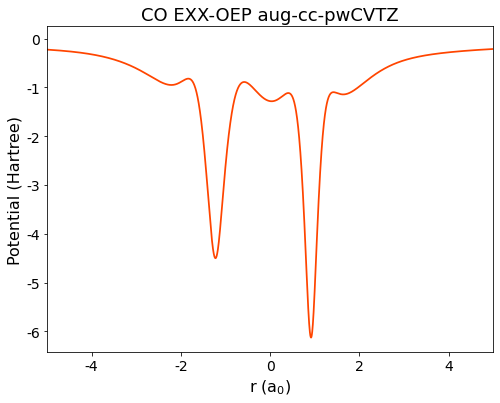

In [5]:
plt.figure(figsize=(8,6))
plt.title("CO EXX-OEP aug-cc-pwCVTZ")
plt.ylabel('Potential (Hartree)')
plt.xlabel('r (a$_0$)')
plt.xlim(-5.0, 5.0)
coord, v_exchange = load_potential("Outputs/CO_EXX_aug-cc-pwCVTZ/vx.z")
plt.plot(coord, v_exchange, color="orangered")
plt.show()

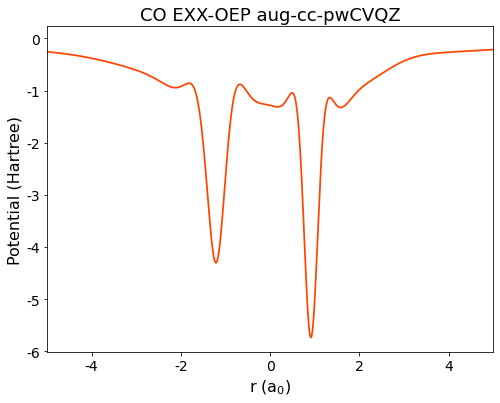

In [6]:
plt.figure(figsize=(8,6))
plt.title("CO EXX-OEP aug-cc-pwCVQZ")
plt.ylabel('Potential (Hartree)')
plt.xlabel('r (a$_0$)')
plt.xlim(-5.0, 5.0)
coord, v_exchange = load_potential("Outputs/CO_EXX_aug-cc-pwCVQZ/vx.z")
plt.plot(coord, v_exchange, color="orangered")
plt.show()

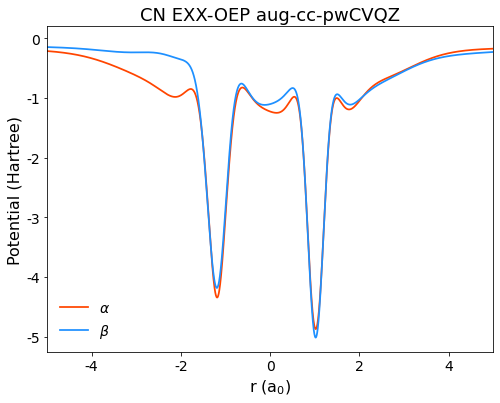

In [7]:
plt.figure(figsize=(8,6))
plt.title("CN EXX-OEP aug-cc-pwCVQZ")
plt.ylabel('Potential (Hartree)')
plt.xlabel('r (a$_0$)')
plt.xlim(-5.0, 5.0)
coord, v_exchange = load_potential("Outputs/CN_EXX_aug-cc-pwCVQZ/vxa.z")
plt.plot(coord, v_exchange, color="orangered", label=r"$\alpha$")
coord, v_exchange = load_potential("Outputs/CN_EXX_aug-cc-pwCVQZ/vxb.z")
plt.plot(coord, v_exchange, color="dodgerblue", label=r"$\beta$")
plt.legend(frameon=False)
plt.show()

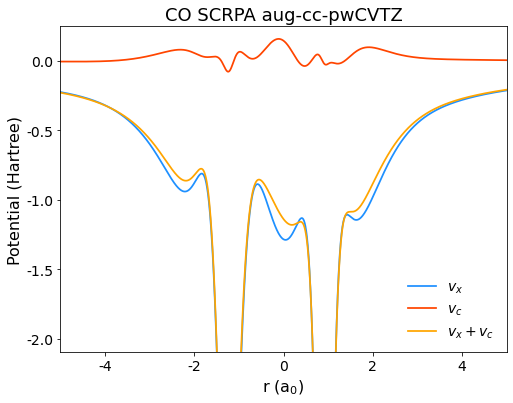

In [8]:
plt.figure(figsize=(8,6))
plt.title("CO SCRPA aug-cc-pwCVTZ")
plt.ylabel('Potential (Hartree)')
plt.xlabel('r (a$_0$)')
plt.ylim(-2.1, 0.25)
plt.xlim(-5.0, 5.0)
coord, v_exchange = load_potential("Outputs/CO_RPA_aug-cc-pwCVTZ/vx.z")
plt.plot(coord, v_exchange, color="dodgerblue", label="$v_x$")
coord, v_corr = load_potential("Outputs/CO_RPA_aug-cc-pwCVTZ/vc.z", pot_type="correlation")
plt.plot(coord, v_corr, color="orangered", label="$v_c$")
plt.plot(coord, v_exchange+v_corr, color="orange", label="$v_x + v_c$")
plt.legend(frameon=False, loc=4)
plt.show()

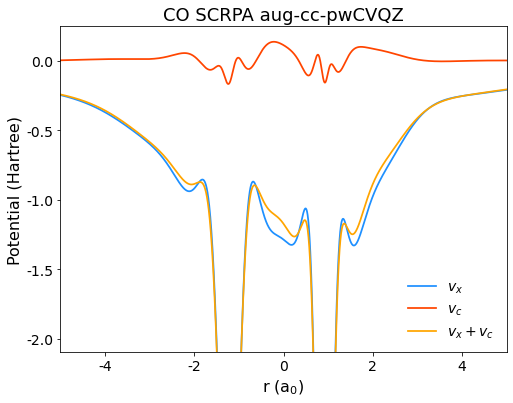

In [9]:
plt.figure(figsize=(8,6))
plt.title("CO SCRPA aug-cc-pwCVQZ")
plt.ylabel('Potential (Hartree)')
plt.xlabel('r (a$_0$)')
plt.ylim(-2.1, 0.25)
plt.xlim(-5.0, 5.0)
coord, v_exchange = load_potential("Outputs/CO_RPA_aug-cc-pwCVQZ/vx.z")
plt.plot(coord, v_exchange, color="dodgerblue", label="$v_x$")
coord, v_corr = load_potential("Outputs/CO_RPA_aug-cc-pwCVQZ/vc.z", pot_type="correlation")
plt.plot(coord, v_corr, color="orangered", label="$v_c$")
plt.plot(coord, v_exchange+v_corr, color="orange", label="$v_x + v_c$")
plt.legend(frameon=False, loc=4)
plt.show()